<a href="https://colab.research.google.com/github/mnbpdx/button-presser-agent/blob/main/button_presser_agent_with_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# button presser agent with memory

## install dependencies

In [1]:
%pip install --quiet -U langchain_openai langchain_core langgraph

## set the OpenAI API Key

In [2]:
import os, getpass

def _set_env(var: str):
  if not os.environ.get(var):
    os.environ[var] = getpass.getpass(f"{var} = ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY = ··········


## set up logging to LangSmith

In [3]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "my-simple-bot"

LANGCHAIN_API_KEY = ··········


## Define the LLM model

In [25]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

## Define button press tool

In [5]:
def press_button():
  """Presses a button.
  """
  print("Button pressed!")

## Bind tools to the LLM

In [6]:
llm_with_button_press_tool = llm.bind_tools([press_button])

## Build the LLM Node

In [26]:
from langgraph.graph import MessagesState
from langchain_core.messages import trim_messages

def llm_with_button_press_tool_node(state: MessagesState):

  # this step trims the conversation to 100 tokens
  messages = trim_messages(
    messages=state["messages"],
    strategy="last",
    token_counter=ChatOpenAI(model="gpt-4o-mini"),
    max_tokens=100,
    start_on="human",
    allow_partial=False,
  )

  return {"messages": [llm_with_button_press_tool.invoke(messages)]}

## Build the Graph

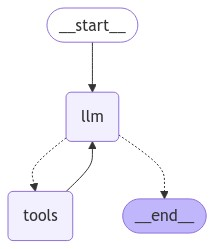

In [27]:
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image
from langgraph.checkpoint.memory import MemorySaver

builder = StateGraph(MessagesState)

builder.add_node("llm", llm_with_button_press_tool_node)
builder.add_node("tools", ToolNode([press_button]))

builder.add_edge(START, "llm")
builder.add_conditional_edges("llm", tools_condition)
builder.add_edge("tools", "llm")

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [30]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}

messages = [HumanMessage(content="how many times has the button been pressed?")]
messages = graph.invoke({"messages": messages}, config)

for m in messages['messages']:\
    m.pretty_print()


================================ Human Message =================================

how many times has the button been pressed?
================================== Ai Message ==================================

I'm unable to determine how many times the button has been pressed, as I don't have access to that information. If you want to press the button, I can assist with that. Would you like to press it?
================================ Human Message =================================

press the button 4 times!
================================== Ai Message ==================================
Tool Calls:
  press_button (call_9TlSYnh4oMN29t5fKAjWuE6m)
 Call ID: call_9TlSYnh4oMN29t5fKAjWuE6m
  Args:
  press_button (call_TPnGtbx8b8Oh4F2kWT8YBWO7)
 Call ID: call_TPnGtbx8b8Oh4F2kWT8YBWO7
  Args:
  press_button (call_VSS6AvbB47cj4meTiowJQE87)
 Call ID: call_VSS6AvbB47cj4meTiowJQE87
  Args:
  press_button (call_ijOfCgylMH7iL9AHsp5LidhF)
 Call ID: call_ijOfCgylMH7iL9AHsp5LidhF
  Args:
==============